# PCA

In [1]:
from PIL import Image
import numpy as np
from reduce_dim import PCA, LDA
from utils_for_data import *
from functions import *
import matplotlib.pyplot as plt
import os
import time

## Make Dataset

In [2]:
train = make_trainset()
test = make_testset()

## Generate PCA model

In [3]:
pca = PCA(num=5) # num: dimension

## Training

In [4]:
start = time.time()
pca.fit(train-mean(train))
print(time.time()-start)

190.36101365089417


## Eval

In [5]:
# gallery, query 나누기
gallery, query = divide(test)
    
# gallery, query transform
gallery_transformed = pca.transform(gallery-mean(gallery))
query_transformed = pca.transform(query-mean(query))
    
# similarity 계산
gallery_transformed_r = gallery_transformed.reshape(28,1,5)
query_transformed_r = query_transformed.reshape(1,12,5)
    
similarity = np.sum(np.square(query_transformed_r-gallery_transformed_r),axis=-1)
similarity = similarity.T
    
# acc 계산
result, acc = compute_result_and_accuracy(similarity)

## Result

In [6]:
result

[array([[6, 0, 0, 1],
        [6, 0, 0, 1],
        [7, 0, 0, 0]]),
 array([[0, 7, 0, 0],
        [0, 7, 0, 0],
        [0, 7, 0, 0]]),
 array([[0, 0, 7, 0],
        [0, 0, 7, 0],
        [0, 0, 7, 0]]),
 array([[0, 0, 0, 7],
        [1, 0, 0, 6],
        [0, 1, 0, 6]])]

## Accuaracy

In [7]:
acc

array([[ 90.47619048,   0.        ,   0.        ,   9.52380952],
       [  0.        , 100.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 100.        ,   0.        ],
       [  4.76190476,   4.76190476,   0.        ,  90.47619048]])

## Draw 3d plot

/home/yura/yura11/functions.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.scatter(gallery_transformed[:, 0].astype(np.float32), gallery_transformed[:,1].astype(np.float32), gallery_transformed[:, 2].astype(np.float32), c='red')
/home/yura/yura11/functions.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.scatter(query_transformed[:, 0].astype(np.float32), query_transformed[:,1].astype(np.float32), query_transformed[:, 2].astype(np.float32), c='blue')


<Figure size 960x960 with 0 Axes>

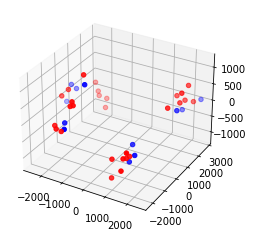

In [8]:
# eigen matrix 찍을 준비
eig_mat = pca.eig_mat[:,0:5]
eig_mat_t=eig_mat.T
eig_mat_f=eig_mat_t.reshape(5,112,92)

make_3d_plot(gallery_transformed, query_transformed)

## Prepare for reconstruction

In [9]:
recon_g = np.matmul(gallery_transformed,eig_mat.T)+np.mean(gallery, axis=0, keepdims=True)
recon_q = np.matmul(query_transformed,eig_mat.T)+np.mean(query, axis=0, keepdims=True)

recon_g_r=recon_g.reshape(28,112,92)
recon_q_r=recon_q.reshape(12,112,92)

gallery_r = gallery.reshape(28,112,92)
query_r = query.reshape(12,112,92)

## gallery 

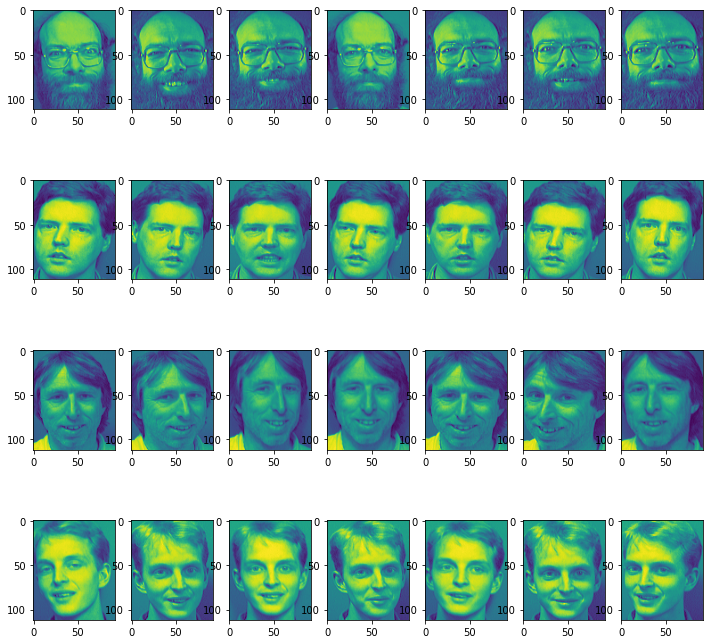

In [10]:
plot_pca(gallery_r,4,7)

## reconstructed gallery

plot_pca(recon_g_r,4,7)

## query image

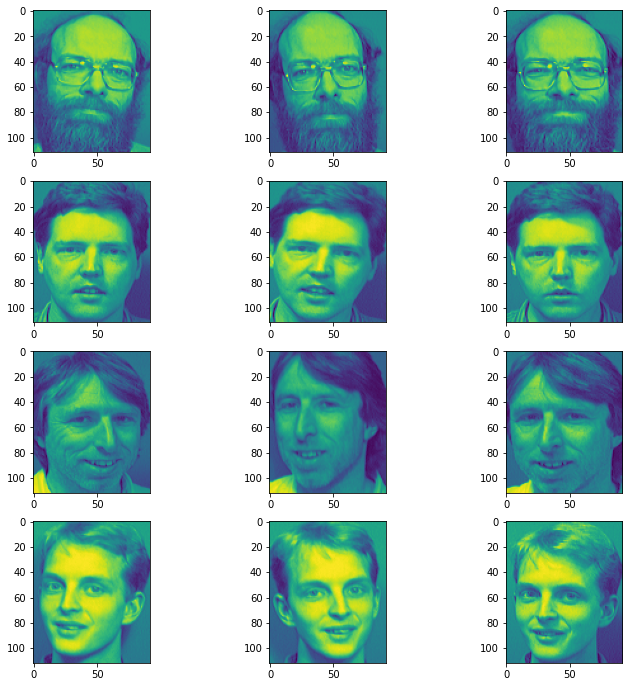

In [11]:
plot_pca(query_r,4,3)

## reconstructed query

/home/yura/yura11/functions.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  for image, ax in zip(test.astype(np.float32), axes.ravel()):


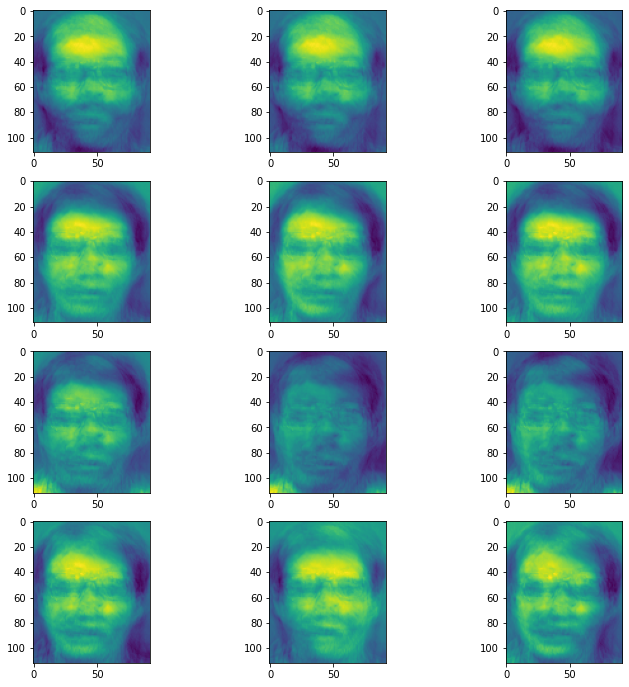

In [12]:
plot_pca(recon_q_r,4,3)

## eigenface

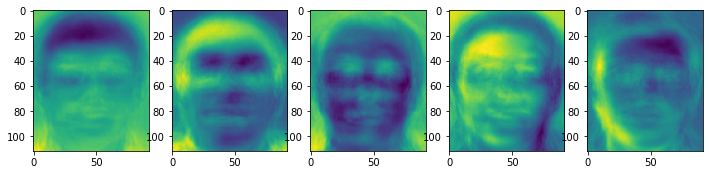

In [13]:
plot_pca(eig_mat_f,1,5)